['Music', 'Art', 'Dance', 'Science', 'Technology', 'Literature', 'Katie Keller', 'Brian Aranoff', 'Claire Dunn', 'Shawn Medows', 'Kris Porter', 'Academic', 'Vocational', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[('Music', 'Vocational'), ('Art', 'Vocational'), ('Dance', 'Vocational'), ('Science', 'Academic'), ('Technology', 'Academic'), ('Literature', 'Academic'), ('Katie Keller', 2), ('Katie Keller', 3), ('Brian Aranoff', 6), ('Brian Aranoff', 8), ('Claire Dunn', 0), ('Claire Dunn', 7), ('Shawn Medows', 4), ('Shawn Medows', 5), ('Kris Porter', 1), ('Kris Porter', 9), (0, 'Literature'), (1, 'Art'), (2, 'Science'), (3, 'Literature'), (4, 'Science'), (5, 'Technology'), (6, 'Science'), (7, 'Art'), (8, 'Science'), (9, 'Technology')]


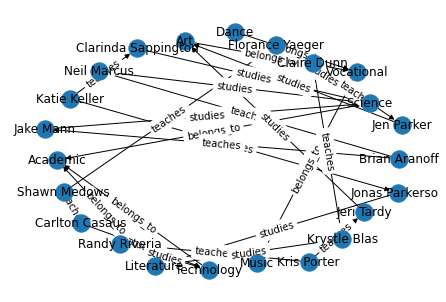

In [109]:
import networkx as nx
import matplotlib.pyplot as plt
import random

student_names_list = ['Krystle Blas', 'Jeri Tardy', 'Clarinda Sappington', 'Jonas Parkerson', 'Florance Yaeger',
                     'Carlton Casaus', 'Neil Marcus', 'Jen Parker', 'Jake Mann', 'Randy Riveria']

subjects = ['Music', 'Art', 'Dance', 'Science', 'Technology', 'Literature']

category = ['Academic', 'Vocational']

teachers = ['Katie Keller', 'Brian Aranoff', 'Claire Dunn', 'Shawn Medows', 'Kris Porter']

# create subjects and categories and its relationship. Create Teachers for whose edges will be created in create_student_relations function
def create_node_groups(G):
    G.add_nodes_from([(subjects[i], {'label' : 'Subject', 'name' :subjects[i]}) for i in range(len(subjects))])
    G.add_nodes_from([(teachers[i], {'label' : 'Teacher', 'name' :teachers[i]}) for i in range(len(teachers))])
    G.add_nodes_from([(category[i], {'label' : 'category', 'name' :category[i]}) for i in range(len(category))])
    G.add_edges_from([(subjects[k], category[1]) for k in range(3)], type='belongs_to')
    G.add_edges_from([(subjects[k], category[0]) for k in range(3,len(subjects))], type='belongs_to')

# create student related to teacher and subject
def create_student_relations(G, n):
    for  j in range(0, n):
        sub = random.choice(subjects)
        teacher = random.choice(teachers)
        G.add_node(j, label='Student', name=student_names_list[j])
        G.add_node(teacher, label="Teacher", name=teacher)
        G.add_edge(teacher,j, type='teaches')    
        G.add_edge(j, sub, type='studies')    

    
G = nx.DiGraph()
create_node_groups(G)
create_student_relations(G, len(student_names_list))

print(G.nodes)
print(G.edges)

pos = nx.spring_layout(G, 20) 
nx.draw(G, pos)

node_labels = nx.get_node_attributes(G, 'name')
nx.draw_networkx_labels(G, pos, labels=node_labels)

edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()